In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PREPROCESSING

In [41]:
# haversine formula
def haversine(lat1, lon1, lat2, lon2):
	R = 6371000  # radius of Earth in meters
	phi1 = np.radians(lat1)
	phi2 = np.radians(lat2)
	delta_phi = np.radians(lat2 - lat1)
	delta_lambda = np.radians(lon2 - lon1)
	a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
	c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
	meters = R * c  # output distance in meters
	return meters

def get_distance(df):
	# calculate distance between all points
	distances = [0]
	for i in range(1, len(df)):
		distance = haversine(df['Lat'].iloc[i-1], df['Lon'].iloc[i-1], df['Lat'].iloc[i], df['Lon'].iloc[i])
		distances.append(distance)
	return distances

def get_duration(df):
	return df['Time'] - df['Time'].min()

def get_progress(df):
	return df['Duration'] / df['Duration'].max()

def preprocess(df):
	# convert time (from 1970) to datetime
	df['Timestamp'] = pd.to_datetime(df['Time'], unit='s')
	# convert time to duration
	df['Duration'] = get_duration(df)
	# convert duration to progress
	df['Progress'] = get_progress(df) * 100
	# convert lat/lon to distance
	df['Distance_diff'] = get_distance(df)
	# convert distance to comulative distance
	df['Distance'] = df['Distance_diff'].cumsum()

	return df

SITTING DATA

In [42]:
df_gps = pd.read_csv('data/sit/gps.csv')
# df_cell = pd.read_csv('data/sit/cell.csv')

df_gps.head()

,Time,Lat,Lon,Altitude,Accuracy,Heading,Speed,Battery
0,1739951497,42.355589,-71.098808,10.800000,20.000000,-1.0,-1.0,0.95
1,1739951520,42.355576,-71.098686,6.557553,12.846121,-1.0,-1.0,0.95
2,1739951520,42.354444,-71.097188,11.221894,1480.330199,-1.0,-1.0,0.95
3,1739951521,42.355595,-71.098850,6.996619,19.998177,-1.0,-1.0,0.95
4,1739951527,42.355593,-71.098847,6.993284,19.973937,-1.0,-1.0,0.95


In [43]:
df_gps = preprocess(df_gps)
# df_cell = preprocess(df_cell)

df_gps.head()

,Time,Lat,Lon,Altitude,Accuracy,Heading,Speed,Battery,Timestamp,Duration,Progress,Distance_diff,Distance
0,1739951497,42.355589,-71.098808,10.800000,20.000000,-1.0,-1.0,0.95,2025-02-19 07:51:37,0,0.000000,0.000000,0.000000
1,1739951520,42.355576,-71.098686,6.557553,12.846121,-1.0,-1.0,0.95,2025-02-19 07:52:00,23,0.119338,10.129002,10.129002
2,1739951520,42.354444,-71.097188,11.221894,1480.330199,-1.0,-1.0,0.95,2025-02-19 07:52:00,23,0.119338,176.000593,186.129595
3,1739951521,42.355595,-71.098850,6.996619,19.998177,-1.0,-1.0,0.95,2025-02-19 07:52:01,24,0.124527,187.149310,373.278905
4,1739951527,42.355593,-71.098847,6.993284,19.973937,-1.0,-1.0,0.95,2025-02-19 07:52:07,30,0.155658,0.318722,373.597627


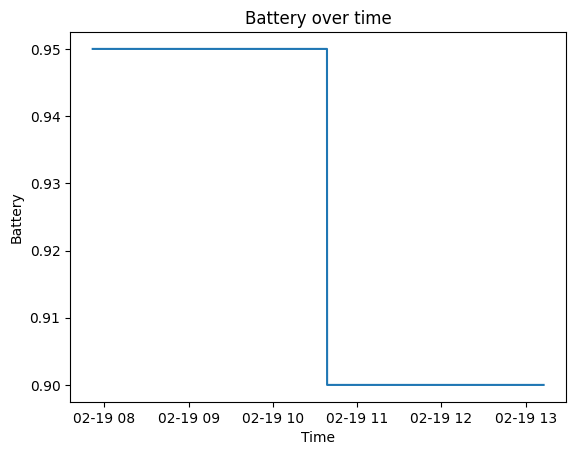

In [44]:
# plot battery over time

plt.plot(df_gps['Timestamp'], df_gps['Battery'])
plt.xlabel('Time')
plt.ylabel('Battery')
plt.title('Battery over time')
plt.show()

WALKING DATA

In [23]:
# read log.csv into df
df_cell = pd.read_csv('data/walk/cell2.csv')
df_cell_wifion = pd.read_csv('data/walk/cell+wifion.csv')
df_wifi = pd.read_csv('data/walk/wifi2.csv')
df_gps = pd.read_csv('data/walk/gps.csv')
df_cell.head()

,Time,Lat,Lon,Altitude,Accuracy,Heading,Speed,Battery
0,1.739991e+09,42.360343,-71.094495,3.361038,33.067011,-1.0,-1.0,0.8
1,1.739991e+09,42.360045,-71.094258,3.624718,34.626435,-1.0,-1.0,0.8
2,1.739991e+09,42.360045,-71.094258,3.624416,47.902381,-1.0,-1.0,0.8
3,1.739991e+09,42.360480,-71.094115,3.625015,35.507480,-1.0,-1.0,0.8
4,1.739991e+09,42.360479,-71.094116,3.624416,55.065759,-1.0,-1.0,0.8


In [24]:
df_cell = preprocess(df_cell)
df_cell_wifion = preprocess(df_cell_wifion)
df_wifi = preprocess(df_wifi)
df_gps = preprocess(df_gps)

df_cell.head()

,Time,Lat,Lon,Altitude,Accuracy,Heading,Speed,Battery,Timestamp,Duration,Progress,Distance_diff,Distance
0,1.739991e+09,42.360343,-71.094495,3.361038,33.067011,-1.0,-1.0,0.8,2025-02-19 18:54:08.703496933,0.000000,0.000000,0.000000,0.000000
1,1.739991e+09,42.360045,-71.094258,3.624718,34.626435,-1.0,-1.0,0.8,2025-02-19 18:54:08.703686953,0.000190,0.000070,38.434335,38.434335
2,1.739991e+09,42.360045,-71.094258,3.624416,47.902381,-1.0,-1.0,0.8,2025-02-19 18:54:08.715102911,0.011606,0.004263,0.000000,38.434335
3,1.739991e+09,42.360480,-71.094115,3.625015,35.507480,-1.0,-1.0,0.8,2025-02-19 18:54:50.254748105,41.551251,15.261949,49.776381,88.210715
4,1.739991e+09,42.360479,-71.094116,3.624416,55.065759,-1.0,-1.0,0.8,2025-02-19 18:55:10.083249092,61.379752,22.545041,0.138258,88.348973


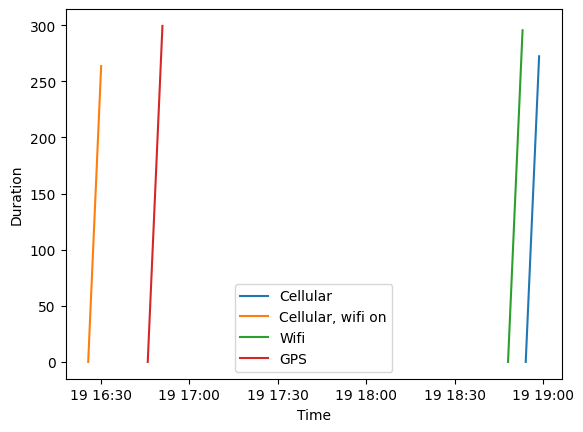

In [25]:
# plot durations
plt.plot(df_cell['Timestamp'], df_cell['Duration'], label='Cellular')
plt.plot(df_cell_wifion['Timestamp'], df_cell_wifion['Duration'], label='Cellular, wifi on')
plt.plot(df_wifi['Timestamp'], df_wifi['Duration'], label='Wifi')
plt.plot(df_gps['Timestamp'], df_gps['Duration'], label='GPS')
plt.xlabel('Time')
plt.ylabel('Duration')
plt.legend()

In [26]:
print("Resolution:")
print("Cellular, wifi is off: {} samples".format(len(df_cell)))
print("Cellular, wifi is on: {} samples".format(len(df_cell_wifion)))
print("Wifi, cell is off: {} samples".format(len(df_wifi)))
print("GPS: {} samples".format(len(df_gps)))

Resolution:
Cellular, wifi is off: 15 samples
Cellular, wifi is on: 110 samples
Wifi, cell is off: 59 samples
GPS: 276 samples


In [27]:
TRUTH = 492.5

print("Total distances:")
print("Cellular, wifi is off: {}, error: {}".format(df_cell['Distance_diff'].sum().round(2), abs(TRUTH - df_cell['Distance_diff'].sum()).round(2)))
print("Cellular, wifi is on: {}, error: {}".format(df_cell_wifion['Distance_diff'].sum().round(2), abs(TRUTH - df_cell_wifion['Distance_diff'].sum()).round(2)))
print("Wifi, cell is off: {}, error: {}".format(df_wifi['Distance_diff'].sum().round(2), abs(TRUTH - df_wifi['Distance_diff'].sum()).round(2)))
print("GPS: {}, error: {}".format(df_gps['Distance_diff'].sum().round(2), abs(TRUTH - df_gps['Distance_diff'].sum()).round(2)))

Total distances:
Cellular, wifi is off: 645.07, error: 152.57
Cellular, wifi is on: 671.73, error: 179.23
Wifi, cell is off: 553.21, error: 60.71
GPS: 559.54, error: 67.04


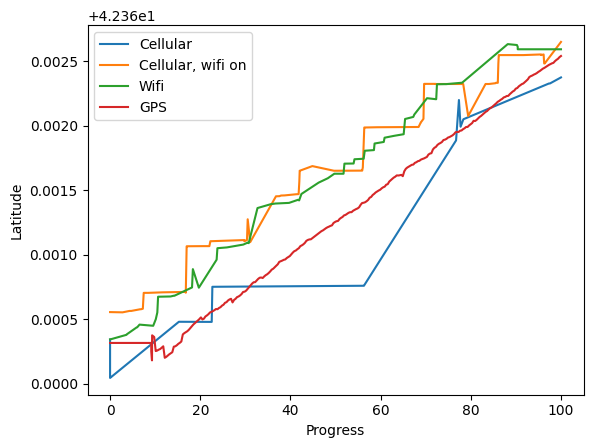

In [33]:
# print Lat over progress
plt.plot(df_cell['Progress'], df_cell['Lat'], label='Cellular')
plt.plot(df_cell_wifion['Progress']*(-1)+100, df_cell_wifion['Lat'], label='Cellular, wifi on')
plt.plot(df_wifi['Progress']*(-1)+100, df_wifi['Lat'], label='Wifi')
plt.plot(df_gps['Progress'], df_gps['Lat'], label='GPS')
plt.xlabel('Progress')
plt.ylabel('Latitude')
plt.legend()
plt.show()

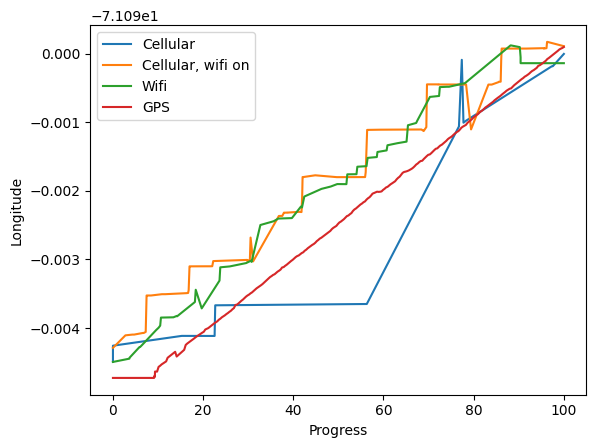

In [34]:
# print Lon over progress
plt.plot(df_cell['Progress'], df_cell['Lon'], label='Cellular')
plt.plot(df_cell_wifion['Progress']*(-1)+100, df_cell_wifion['Lon'], label='Cellular, wifi on')
plt.plot(df_wifi['Progress']*(-1)+100, df_wifi['Lon'], label='Wifi')
plt.plot(df_gps['Progress'], df_gps['Lon'], label='GPS')
plt.xlabel('Progress')
plt.ylabel('Longitude')
plt.legend()
plt.show()

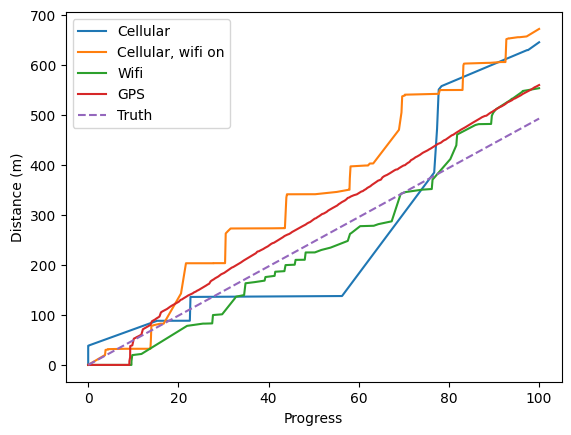

In [31]:
# plot distance over progress
plt.plot(df_cell['Progress'], df_cell['Distance'], label='Cellular')
plt.plot(df_cell_wifion['Progress'], df_cell_wifion['Distance'], label='Cellular, wifi on')
plt.plot(df_wifi['Progress'], df_wifi['Distance'], label='Wifi')
plt.plot(df_gps['Progress'], df_gps['Distance'], label='GPS')
plt.plot([0, 100], [0, TRUTH], label='Truth', linestyle='--')
plt.xlabel('Progress')
plt.ylabel('Distance (m)')
plt.legend()
plt.show()